**ReadMe**

The question 1 is answered in part 1.

The question 2 is answered in part 1.

The question 3 is answered in part 2.

In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
%cd /content/drive/My\ Drive/Winter\ 2022/CME241

Mounted at /content/drive
/content/drive/My Drive/Winter 2022/CME241


In [3]:
import numpy as np
import matplotlib.pyplot as plt

#1. Portfolio Optimization

## Normal Return and Quadratic Utility

From that $U(x) = x -\frac{\alpha x^2}{2}$ and $x \sim \mathcal{N}(\mu, \sigma^2)$, the expected utilty will be 

\begin{align*}
\mathbf{E}[U(x)] &= ∫_{-\infty}^{\infty} \left(x -\frac{\alpha x^2}{2}\right) \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}dx\\
&= ∫_{-\infty}^{\infty} \left(x + \mu -\frac{\alpha x^2}{2}-\frac{\alpha \mu^2}{2} -2\alpha x\mu\right) \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\left(\frac{x}{\sigma}\right)^2}dx\\
&= \mu -\frac{\alpha \mu^2}{2} + ∫_{-\infty}^{\infty} \left(-\frac{\alpha x^2}{2}\right) \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\left(\frac{x}{\sigma}\right)^2}dx\\
&= \mu -\frac{\alpha \mu^2}{2} - \frac{\alpha}{2} ∫_{-\infty}^{\infty} x^2 \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\left(\frac{x}{\sigma}\right)^2}dx\\
&= \mu -\frac{\alpha}{2}(\mu^2 + \sigma^2)
\end{align*}

Thus, we will see that when the variance become higher, the expected utility will be lowered.

From this point, we can find the certainty equivalent $x_{CE}$.
Note that if $\alpha \to 0$, $x_{CE} \to \mu$.

\begin{align*}
x_{CE} -\frac{\alpha}{2} x_{CE}^2 &= \mu -\frac{\alpha}{2}(\mu^2 + \sigma^2)\\
x_{CE}^2 -\frac{2}{\alpha} x_{CE} &= \mu^2 + \sigma^2 -\frac{2}{\alpha} \mu\\
\left(x_{CE} - \frac{1}{\alpha} \right)^2 &= \mu^2 + \sigma^2 -\frac{2}{\alpha} \mu + \frac{1}{\alpha^2}\\
&= \left(\mu - \frac{1}{\alpha}\right)^2 + \sigma^2
\end{align*}

The answer will not be unique, since the utility function is a parabola. However, in this one, we assume that $\alpha$ is small enough (so that the utikltiy is increasing in the region where our distribution is mostly in), and we assume that the certainty equivalent will be the one souch that both terms inside square are negative. Thus,

\begin{align*}
-x_{CE} + \frac{1}{\alpha}
&= \sqrt{\left(\frac{1}{\alpha} - \mu\right)^2 + \sigma^2}\\
x_{CE} &= \frac{1}{\alpha} - \sqrt{\left(\frac{1}{\alpha} - \mu\right)^2 + \sigma^2}
\end{align*}

Risk premium will be
\begin{align*}
\pi_A
&= \mu - x_{CE}\\
&= \mu - \frac{1}{\alpha} + \sqrt{\left(\frac{1}{\alpha} - \mu\right)^2 + \sigma^2}\\
&= \sqrt{\left(\frac{1}{\alpha} - \mu\right)^2 + \sigma^2} - \left(\frac{1}{\alpha} - \mu\right)
\end{align*}


Next, we will look into how this knowledge be useful for finding optimal stratgey for the (specific) investment.

Let $x$ be a return of one dollar in the risky investment after 1 year, so $x \sim \mathcal{N}(\mu, \sigma^2)$.

Thus, for the strategy in which we put $z$ in the risky investment and $1,000,000 - z$ for the risk-free investment, the (random) return will be $1000000 + zx + (1000000-z)r \sim \mathcal{N}(1000000 + z\mu + (1000000-z)r, z^2\sigma^2)$. Thus, the expected utility will be $1000000+z\mu + (1000000-z)r - \frac{\alpha}{2} \left( (1000000+z\mu + (1000000-z)r)^2 + z^2\sigma^2\right)$. 

It is obvious that if $\mu \le r$, then the optimal $z = -\infty$. Thus, we will consider the case when $\mu > r$.

The optimal $z$ will satisfy 
\begin{align*}
0 &= \mu-r -\alpha\sigma^2z -\alpha(1000000+z\mu + (1000000-z)r)(\mu-r)\\
\mu-r &= \alpha\sigma^2z + \alpha(\mu-r)(1000000(1+r)+z(\mu-r))\\
z(\alpha\sigma^2+\alpha(\mu-r)^2) &= (\mu-r)(1-1000000\alpha (1+r))\\
z &= \frac{(\mu-r)(1-1000000\alpha (1+r))}{\alpha\sigma^2+\alpha(\mu-r)^2}
\end{align*}

For visualization, let consider the case when $r=0.04$, $\sigma = 0.20$, and $\mu=0.10$.

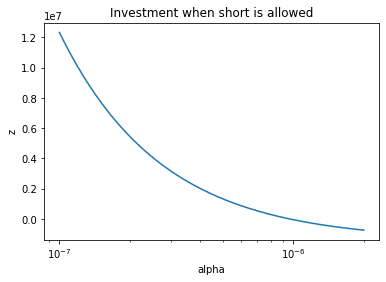

In [21]:
r = 0.04
mu = 0.10
sigma = 0.20

alpha_arr = np.linspace(0.0000001,0.000002, 500)

z_arr = []

for alpha in alpha_arr:
  z = (mu-r)*(1-1000000*alpha*(1+r)) / alpha / (np.square(sigma) + np.square(mu-r))
  z_arr.append(z)

plt.plot(alpha_arr, z_arr)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('alpha')
plt.ylabel('z')
plt.title('Investment when short is allowed')
plt.show()

If we impose the constraint that short is not allowed. Then $z = max(0, min(z, 1000000))$

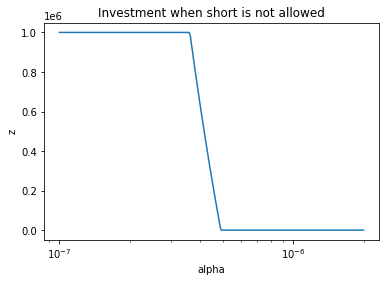

In [22]:
r = 1.04
mu = 1.10
sigma = 0.20

alpha_arr = np.linspace(0.0000001,0.000002, 500)
z_arr = []

for alpha in alpha_arr:
  z = (mu-r)*(1-1000000*alpha*(1+r)) / alpha / (np.square(sigma) + np.square(mu-r))
  z_arr.append(max(0, min(z, 1000000)))

plt.plot(alpha_arr, z_arr)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('z')
plt.title('Investment when short is not allowed')
plt.show()

## Log-Normal Return and Log Utility

The normal return is usually deemed unrealistic due to the fact that the price can go below zero. Therefore, we somtimes model the transition is price as an exponential of a normal random variable instead. 

Moreover, the quadratic utility is also not quite realistic. Although it is strictly concave, it is not even weakly monotone. In this formulation, we focus on log utility function, which is a type of CRRA utility.

We will further assume that the portfoilio can be dynamically adjusted as the time advances in order to maintain the ratio of investment in the risky asset to be a constant $\pi$.

Let the return of a unit investment in a risky asset be $X$, which is a random variable. In this process, let $B_t$ be a brownian motion, and $W_t$ be wealth. Consider the change of wealth at an infinistesimal time

\begin{align*}
  dW_t =  (r+\pi(\mu-r))W_tdt + \pi\sigma W_tdB_t
\end{align*}

Thus, from Ito's Formula and the marginal distribution of a brwonian motion,
\begin{align*}
  \log W_1 \sim \mathcal{N}(r+\pi(\mu-r) - \frac{\pi^2\sigma^2}{2}, \pi^2\sigma^2)
\end{align*}

Thus, we have to maximize
\begin{align*}
  \mathbf{E}[U(W_1)] = \mathbf{E}[\log W_1]
  = r+\pi(\mu-r) - \frac{\pi^2\sigma^2}{2}
\end{align*}

Thus, the optimal $\pi$ is 
\begin{align*}
  \frac{\mu-r}{\gamma \sigma^2}
\end{align*}

when $\mu > r$. Otherwise, $\pi^* = 0$.

#2. Casino Game

With probability $p$, the outcome will be $W = W_0 + f\alpha W_0$ and the utility will be $\log W = \log W_0 + \log(1+f\alpha)$.

With probability $1-p$, the outcome will be $W = W_0 - f\beta W_0$ and the utility will be $\log W = \log W_0 + \log(1-f\beta)$.

Thus, the expected utility will be $\log W_0 + p\log(1+f\alpha) + (1-p)\log(1-f\beta)$.

Therefore, we will see that the optimal strategy for $f$ will be a constant throughout the game.

From the expression of the expected utility, the optimal $f$ will satisfy the first order condition
\begin{align*}
  \frac{p\alpha}{1+f\alpha} &= \frac{(1-p)\beta}{1-f\beta}\\
  p\alpha-p\alpha f\beta\ &=(1-p)\beta +(1-p)\beta f\alpha\\
  \beta f\alpha &= p(\alpha+\beta) - \beta\\
  f &= p \left( \frac{1}{\alpha} + \frac{1}{\beta}\right) - \frac{1}{\alpha}
\end{align*}

Note that we do not have to explicitly confirm the second order condition since log function is concave, so log of an affine function of $f$ will be a concave function in $f$. Thus, if the derivative of the expected utility function with respect to $f$ is zero, the position will be both local maximum and global maximum.

Note that $\alpha$ has to be large enough comparing to $\beta$, otherwise $f$ will be negative (which can be thought of as being the seller instead). This can be rationalized by considering a more simple case, risk neutral.

In the risk neutral setting, we will select $f$ to be positive only if the expected return is higher than zero, which is when $\alpha$ is relatively large enough. If $\alpha$ is too small, the optimal $f$ will be zero (if we are nit allowed to sell). In this setting, we are risk-averse, so we will employ $f$ to be zero for every case that we would employ zero if we were risk neutral.


